In [107]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.2 Identifikácia problémov, integrácia a čistenie dát

definujeme si funkcie na zistenie duplicitných záznamov, nejednotné formáty, chýbajúce hodnoty a vychýlené hodnoty

In [108]:
# read data
df_connections  = pd.read_csv("data/connections.csv", sep="\t")
df_devices      = pd.read_csv("data/devices.csv", sep="\t")
df_processes    = pd.read_csv("data/processes.csv", sep="\t")
df_profiles     = pd.read_csv("data/profiles.csv", sep="\t")

# identification of the problems:
def df_missing_values(df):
    print(f"Missing values:\n{df.isnull().sum()}")
    
def df_duplicates(df):
    print(f"Duplicates: {df.duplicated().sum()}")

def df_shape(df):
    print(f"Shape: \trows: {df.shape[0]}\n\t\tcolumns: {df.shape[1]}")
    
def df_dtypes(df):
    print(f"Data types:\n{df.dtypes}")

# all in one:
def analyze_dataframe(df, name):
    print(f"\nData set: {name}")
    print(f"Shape: \trows: {df.shape[0]}\n\t\tcolumns: {df.shape[1]}")
    print(f"Missing values:\n{df.isnull().sum()}")
    print(f"Duplicates: {df.duplicated().sum()}")
    print(f"Data types:\n{df.dtypes}")

# for removing duplicates
def remove_duplicates(df):
    initial_count = df.shape[0]
    df = df.drop_duplicates()
    final_count = df.shape[0]
    removed_count = initial_count - final_count
    print(f"Removed {removed_count} duplicate rows.")
    return df

# removing missing values
def remove_nan(df):
    initial_count = df.shape[0]
    df = df.dropna()

    final_count = df.shape[0]
    removed_count = initial_count - final_count

    print(f"Removed {removed_count} rows with missing values.")
    return df


1.2.a

In [109]:
df_connections  = remove_duplicates(df_connections)
df_devices      = remove_duplicates(df_devices)
df_processes    = remove_duplicates(df_processes)
df_profiles     = remove_duplicates(df_profiles)

Removed 179 duplicate rows.
Removed 9 duplicate rows.
Removed 179 duplicate rows.
Removed 0 duplicate rows.


In [110]:
df_connections  = remove_nan(df_connections)
df_devices      = remove_nan(df_devices)
df_processes    = remove_nan(df_processes)
df_profiles     = remove_nan(df_profiles)

Removed 0 rows with missing values.
Removed 1 rows with missing values.
Removed 0 rows with missing values.
Removed 2268 rows with missing values.


In [111]:
analyze_dataframe(df_connections, "connections")


Data set: connections
Shape: 	rows: 14877
		columns: 13
Missing values:
ts                   0
imei                 0
mwra                 0
c.android.chrome     0
c.android.youtube    0
c.dogalize           0
c.android.gm         0
c.katana             0
c.UCMobile.intl      0
c.UCMobile.x86       0
c.raider             0
c.updateassist       0
c.android.vending    0
dtype: int64
Duplicates: 0
Data types:
ts                    object
imei                   int64
mwra                 float64
c.android.chrome     float64
c.android.youtube    float64
c.dogalize           float64
c.android.gm         float64
c.katana             float64
c.UCMobile.intl      float64
c.UCMobile.x86       float64
c.raider             float64
c.updateassist       float64
c.android.vending    float64
dtype: object


In [112]:
analyze_dataframe(df_devices, "devices")
df_dtypes(df_devices)


Data set: devices
Shape: 	rows: 2867
		columns: 6
Missing values:
latitude      0
longitude     0
store_name    0
code          0
location      0
imei          0
dtype: int64
Duplicates: 0
Data types:
latitude      float64
longitude     float64
store_name     object
code           object
location       object
imei            int64
dtype: object
Data types:
latitude      float64
longitude     float64
store_name     object
code           object
location       object
imei            int64
dtype: object


In [113]:
analyze_dataframe(df_processes, "processes")


Data set: processes
Shape: 	rows: 14877
		columns: 23
Missing values:
ts                            0
imei                          0
mwra                          0
p.android.externalstorage     0
p.system                      0
p.android.packageinstaller    0
p.android.settings            0
p.android.chrome              0
p.android.gm                  0
p.android.documentsui         0
p.process.gapps               0
p.gms.persistent              0
p.notifier                    0
p.olauncher                   0
p.dogalize                    0
p.android.gms                 0
p.simulator                   0
p.katana                      0
p.inputmethod.latin           0
p.browser.provider            0
p.android.defcontainer        0
p.android.vending             0
p.google                      0
dtype: int64
Duplicates: 0
Data types:
ts                             object
imei                            int64
mwra                          float64
p.android.externalstorage     float64
p.

In [114]:
analyze_dataframe(df_profiles, "profiles")
df_profiles.head()


Data set: profiles
Shape: 	rows: 355
		columns: 12
Missing values:
mail                0
imei                0
birthdate           0
username            0
user_id             0
address             0
ssn                 0
job                 0
registration        0
current_location    0
company             0
name                0
dtype: int64
Duplicates: 0
Data types:
mail                object
imei                 int64
birthdate           object
username            object
user_id              int64
address             object
ssn                 object
job                 object
registration        object
current_location    object
company             object
name                object
dtype: object


,mail,imei,birthdate,username,user_id,address,ssn,job,registration,current_location,company,name
2,abigail33@yahoo.com,359043379931766940,1929-07-04,burgessedward,2558,"0755 Scott Parks Apt. 877\nBowersborough, PW 0...",559-66-9181,Academic librarian,"05/17/2024, 00:00:00","(Decimal('-19.5608945'), Decimal('-175.139772'))","Underwood, Hughes and Alexander",Michelle Martin
9,kimberlycole@yahoo.com,3590433799317661743,1980-03-20,victoria79,1517,"4681 Donald Plaza Apt. 819\nAlyssahaven, NE 16176",792-70-7654,Sports coach,"04/03/2020, 00:00:00","(Decimal('40.478458'), Decimal('-65.656674'))","Smith, Smith and Wheeler",Adam Thomas
17,mclayton@gmail.com,8630330696303481594,1997-12-29,laurenperry,62,"44173 Sophia Curve Apt. 292\nAllenfurt, KY 80351",730-18-9437,TEFL teacher,11 Feb 2023,"(Decimal('70.5156535'), Decimal('-84.149757'))",Newman Ltd,Katie Watkins
30,kellyjames@gmail.com,8630330696303481982,1953-12-11,nicole80,745,"5808 Key Turnpike\nBrittanymouth, MP 38939",282-65-1993,Biomedical scientist,15 Aug 2022,"(Decimal('25.5423705'), Decimal('75.549933'))",Smith Group,Danny Hernandez
34,moralesjames@yahoo.com,3590433799317661446,1950-10-17,emilywilliams,1902,"54680 Estrada Estate\nAndreport, MA 57184",149-23-3842,Legal secretary,2019-01-14,"(Decimal('-51.831089'), Decimal('38.371928'))",Cruz Ltd,Elizabeth Sanchez


V profiloch sme sa snažili upraviť dáta na správny touple, ktorý obsahuje dáta typu float

In [115]:
df_profiles_cleaned = df_profiles.dropna(subset=['current_location'])
print(f"All: {df_profiles.shape[0]}")
print(f"Cleaned: {df_profiles_cleaned.shape[0]}")

All: 355
Cleaned: 355


In [116]:
def remove_non_numeric_chars(coord_str):
    if pd.notnull(coord_str):
        coord_str = str(coord_str)
        
        coord_str_clean = re.sub(r"[^0-9\-,.]", "", coord_str)
        return coord_str_clean
    return None

def convert_decimal_to_float(coord):
    if pd.notnull(coord):
        coord = coord.split(',')
        
        latitude = float(coord[0])
        longitude = float(coord[1])
        
        return (latitude, longitude)
    
    return None

df_profiles['current_location'] = df_profiles['current_location'].apply(remove_non_numeric_chars)

df_profiles['current_location'] = df_profiles['current_location'].apply(convert_decimal_to_float)

print(df_profiles['current_location'].head())

2     (-19.5608945, -175.139772)
9        (40.478458, -65.656674)
17      (70.5156535, -84.149757)
30       (25.5423705, 75.549933)
34       (-51.831089, 38.371928)
Name: current_location, dtype: object


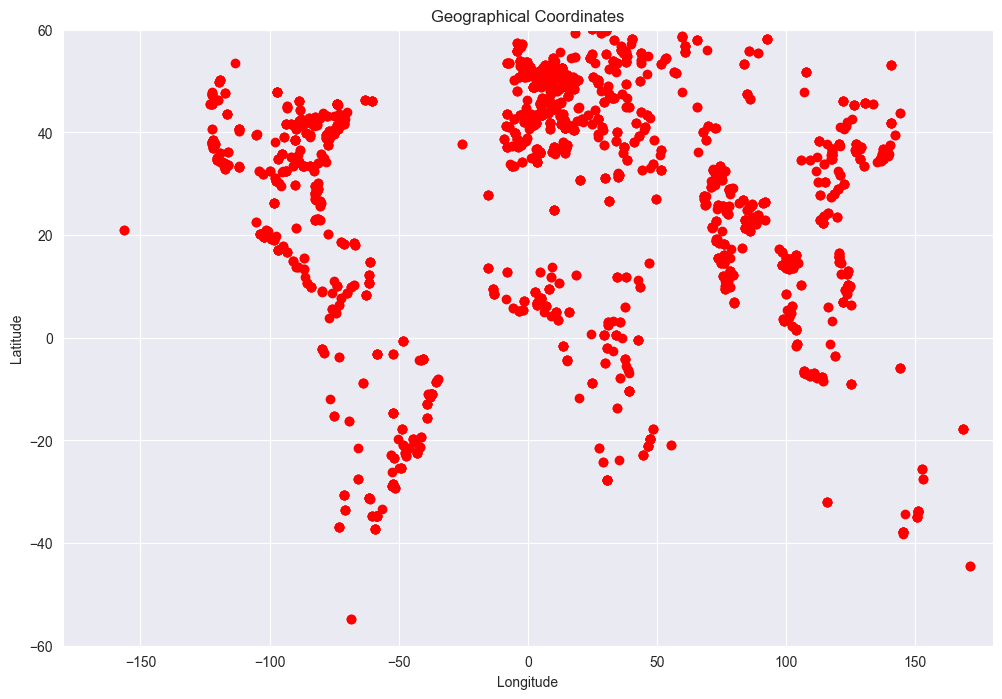

In [117]:
def plot_points(df):
    plt.figure(figsize=(12, 8))

    plt.scatter(df['longitude'], df['latitude'], marker='o', color='red')

    plt.title('Geographical Coordinates')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.xlim(-180, 180)
    plt.ylim(-60, 60)

    plt.grid(True)
    plt.show()

plot_points(df_devices)